## DATASET CELLULAR SERVICE SENTIMENT ANALYSIS USING NLP and K-NN Algorithm
BY : KELOMPOK 3 <**br**>
Tugas Web & Text Mining

In [66]:
import string
import pandas as pd
import numpy as np


### IMPORTING DATASET
Di sini saya menggunakan library pandas untuk menampilkan dan membaca dataset.

In [83]:
data = pd.read_csv("sentiment_cellular.csv", sep=',', encoding='latin1')
data.head(10)

,Sentiment,Text Tweet
0,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
2,negative,Selamat pagi <PROVIDER_NAME> bisa bantu kenap...
3,negative,Dear <PROVIDER_NAME> akhir2 ini jaringan data ...
4,negative,Selamat malam PENDUSTA <PROVIDER_NAME>
5,negative,Untuk penembakan paket dari <PRODUCT_NAME> mas...
6,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa..."
7,negative,RT <USER_MENTION>: <PROVIDER_NAME> tak ada lag...
8,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...
9,negative,#Bilboard iklan <PROVIDER_NAME> kok ada pesan ...


### Proses Celaning Data

In [84]:
# proses case folding
def casefolding(Review):
    Review = Review.lower()
    return Review
data['Text Tweet'] = data['Text Tweet'].apply(casefolding)
data.head(10)

,Sentiment,Text Tweet
0,positive,<user_mention> #boikot_<provider_name> gunakan...
1,positive,"saktinya balik lagi, alhamdulillah :v <provide..."
2,negative,selamat pagi <provider_name> bisa bantu kenap...
3,negative,dear <provider_name> akhir2 ini jaringan data ...
4,negative,selamat malam pendusta <provider_name>
5,negative,untuk penembakan paket dari <product_name> mas...
6,positive,"<provider_name> aku pakai <provider_name>, pa..."
7,negative,rt <user_mention>: <provider_name> tak ada lag...
8,negative,keluhan gak ditanggapi. bikin emosi aja. pulsa...
9,negative,#bilboard iklan <provider_name> kok ada pesan ...


In [85]:
# proses cleansing remove regex (cleansing) seperti tanda baca dan angka angka
import re
import string
def cleansing(Review):
    Review = Review.strip(" ")
    Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
    Review = re.sub(r'\d+', '', Review)
    Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
    Review = re.sub('\s+',' ', Review)
    return Review
data['Text Tweet'] = data['Text Tweet'].apply(cleansing)
data.head(10)


,Sentiment,Text Tweet
0,positive,<usermention> #boikot<providername> gunakan pr...
1,positive,saktinya balik lagi alhamdulillah <providername>
2,negative,selamat pagi <providername> bisa bantu kenapa ...
3,negative,dear <providername> akhir ini jaringan data le...
4,negative,selamat malam pendusta <providername>
5,negative,untuk penembakan paket dari <productname> masi...
6,positive,<providername> aku pakai <providername> paket ...
7,negative,rt <usermention> <providername> tak ada lagi d...
8,negative,keluhan gak ditanggapi bikin emosi aja pulsaku...
9,negative,#bilboard iklan <providername> kok ada pesan t...


In [86]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
#NLTK word tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Text Tweet'] = data['Text Tweet'].apply(word_tokenize_wrapper)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentiment,Text Tweet
0,positive,"[<, usermention, >, #, boikot, <, providername..."
1,positive,"[saktinya, balik, lagi, alhamdulillah, <, prov..."
2,negative,"[selamat, pagi, <, providername, >, bisa, bant..."
3,negative,"[dear, <, providername, >, akhir, ini, jaringa..."
4,negative,"[selamat, malam, pendusta, <, providername, >]"


In [90]:
normalizad_word = pd.read_csv("sentiment_cellular.csv", encoding='latin-1')

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Text Tweet'] = data['Text Tweet'].apply(normalized_term)

data['Text Tweet'].head(20)

<ipython-input-90-75278854db57>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0] not in normalizad_word_dict:
<ipython-input-90-75278854db57>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalizad_word_dict[row[0]] = row[1]


,Text Tweet
0,"[<, usermention, >, #, boikot, <, providername..."
1,"[saktinya, balik, lagi, alhamdulillah, <, prov..."
2,"[selamat, pagi, <, providername, >, bisa, bant..."
3,"[dear, <, providername, >, akhir, ini, jaringa..."
4,"[selamat, malam, pendusta, <, providername, >]"
5,"[untuk, penembakan, paket, dari, <, productnam..."
6,"[<, providername, >, aku, pakai, <, providerna..."
7,"[rt, <, usermention, >, <, providername, >, ta..."
8,"[keluhan, gak, ditanggapi, bikin, emosi, aja, ..."
9,"[#, bilboard, iklan, <, providername, >, kok, ..."


In [95]:

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("sentiment_cellular.csv", encoding='latin-1')
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
data['Text Tweet'] = data['Text Tweet'].apply(stopword_removal)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentiment,Text Tweet
0,positive,"[<, usermention, >, #, boikot, <, providername..."
1,positive,"[saktinya, alhamdulillah, <, providername, >]"
2,negative,"[selamat, pagi, <, providername, >, bantu, kam..."
3,negative,"[dear, <, providername, >, jaringan, data, lem..."
4,negative,"[selamat, malam, pendusta, <, providername, >]"
5,negative,"[penembakan, paket, <, productname, >, ganggua..."
6,positive,"[<, providername, >, pakai, <, providername, >..."
7,negative,"[rt, <, usermention, >, <, providername, >, ka..."
8,negative,"[keluhan, gak, ditanggapi, bikin, emosi, aja, ..."
9,negative,"[#, bilboard, iklan, <, providername, >, pesan..."


### Proses Stemming dan Membuat file data baru (dataset yang sudah dibersihkan melalui proses NLTK)

In [96]:
# proses stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Review:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Text Tweet'] = data['Text Tweet'].apply(stemming)

data.to_csv('sentiment_cellular_2.csv', index=False)
data_clean = pd.read_csv('sentiment_cellular_2.csv', encoding='latin1')
data_clean.head()

 usermention   boikot  providername  produk bangsa  providername 
sakti alhamdulillah  providername 
selamat pagi  providername  bantu kamar sinyal hilang panggil darurat  url 
dear  providername  jaring data lot banget
selamat malam dusta  providername 
tembak paket  productname  ganggu ya  providername 
 providername  pakai  providername  paket  productname  nya udah off ganti paket  productname  yg gratis youtube senang banget  providername 
rt  usermention   providername  kamus perhapean  boikot  providername   url 
keluh gak tanggap bikin emosi aja pulsa curi soak deh pulsa kurang - - hari
 bilboard iklan  providername  pesan sembunyi  boikot  providername   ramadhan  url 
 providername  mampus puasa subuh sahur cek pulsa sedot sisa ribu  providername  tolong baca
 usermention  coba pakai  providername  parah koneksi
tuju  usermention  silah boikot langgan  providername  dukung  hrs  url 
bela bain daftarin kartu tunggu jam siang puasa rumah sinyal gnya gak kota  providername 
 pr

,Sentiment,Text Tweet
0,positive,usermention boikot providername produk ba...
1,positive,sakti alhamdulillah providername
2,negative,selamat pagi providername bantu kamar sinyal...
3,negative,dear providername jaring data lot banget
4,negative,selamat malam dusta providername


In [97]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [98]:
data_clean = pd.read_csv('sentiment_cellular_2.csv', encoding='latin1')
data_clean.head()

,Sentiment,Text Tweet
0,positive,usermention boikot providername produk ba...
1,positive,sakti alhamdulillah providername
2,negative,selamat pagi providername bantu kamar sinyal...
3,negative,dear providername jaring data lot banget
4,negative,selamat malam dusta providername


In [99]:
data_clean = data_clean.astype({'Sentiment' : 'category'})
data_clean = data_clean.astype({'Text Tweet' : 'string'})
data_clean.dtypes

,0
Sentiment,category
Text Tweet,string[python]


## Proses TF-IDF

In [104]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Text Tweet'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Text Tweet'].astype('U'))
print(text_tf)

  (0, 681)	0.3867195794883465
  (0, 81)	0.3544825037361959
  (0, 513)	0.2089990945308186
  (0, 508)	0.5468624635563389
  (0, 46)	0.6181026984439268
  (1, 513)	0.14008235205034986
  (1, 543)	0.8285708605682566
  (1, 11)	0.5420768060535521
  (2, 513)	0.06655504749865963
  (2, 556)	0.3336863094302908
  (2, 472)	0.3482929657559757
  (2, 49)	0.3482929657559757
  (2, 282)	0.3936653844968609
  (2, 580)	0.19922632054952413
  (2, 221)	0.32175180222553995
  (2, 482)	0.3936653844968609
  (2, 125)	0.3936653844968609
  (2, 676)	0.18296239688195018
  (3, 513)	0.10521232095483382
  (3, 128)	0.6223186721236421
  (3, 261)	0.3149432592731495
  (3, 126)	0.42862652122400974
  (3, 363)	0.4138185941137875
  (3, 45)	0.3840495511689364
  (4, 513)	0.11054048083865711
  :	:
  (295, 697)	0.28905748271319226
  (295, 639)	0.39702183165170873
  (295, 341)	0.5465805823799055
  (295, 484)	0.44874220089854444
  (295, 362)	0.44874220089854444
  (296, 513)	0.16420281833346548
  (296, 11)	0.6354157965252006
  (296, 474)	

## Proses Cosine Similarity

In [105]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity

In [106]:
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.02927708 0.01390994 ... 0.02137982 0.01809916 0.01949621]
 [0.02927708 1.         0.00932319 ... 0.0143299  0.01213103 0.0130674 ]
 [0.01390994 0.00932319 1.         ... 0.00680833 0.00576362 0.06183969]
 ...
 [0.02137982 0.0143299  0.00680833 ... 1.         0.00885878 0.00954257]
 [0.01809916 0.01213103 0.00576362 ... 0.00885878 1.         0.0080783 ]
 [0.01949621 0.0130674  0.06183969 ... 0.00954257 0.0080783  1.        ]]


In [114]:
# splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.2, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positive').sum()
neg = (y_test == 'negative').sum()
postrain = (y_train == 'positive').sum()
negtrain = (y_train == 'negative').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['Sentiment'].value_counts()

Jumlah Data Uji: (60, 300)
Jumlah Data Latih: (240, 300)
Jumlah data uji dengan sentimen positif: 25
Jumlah data uji dengan sentimen negatif: 35
Jumlah data latih dengan sentimen positif: 114
Jumlah data latih dengan sentimen negatif: 126


,count
Sentiment,
negative,161
positive,139


### Perform algoritma KNN

In [116]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Dataset Sentimen Analisis Cellular Service :")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="positive"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="positive"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="positive"))
print("error_rate:", 1-accuracy_score(y_test,predicted))


confusion matrix:
 [[32  3]
 [ 7 18]]

TN: 32
FP: 3
FN: 7
TP: 18
              precision    recall  f1-score   support

    negative       0.82      0.91      0.86        35
    positive       0.86      0.72      0.78        25

    accuracy                           0.83        60
   macro avg       0.84      0.82      0.82        60
weighted avg       0.84      0.83      0.83        60


Hasil Klasifikasi Dataset Sentimen Analisis Cellular Service :
Accuracy: 0.8333333333333334
Precision: 0.8571428571428571
Recall: 0.72
f1_score: 0.782608695652174
error_rate: 0.16666666666666663


In [119]:
# splitting data 70:30
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.3, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positive').sum()
neg = (y_test == 'negative').sum()
postrain = (y_train == 'positive').sum()
negtrain = (y_train == 'negative').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['Sentiment'].value_counts()

Jumlah Data Uji: (90, 300)
Jumlah Data Latih: (210, 300)
Jumlah data uji dengan sentimen positif: 41
Jumlah data uji dengan sentimen negatif: 49
Jumlah data latih dengan sentimen positif: 98
Jumlah data latih dengan sentimen negatif: 112


,count
Sentiment,
negative,161
positive,139


In [121]:
# perform algoritma dengan
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("KNN Accuracy:" , accuracy_score(y_test,predicted))
print("KNN Precision:" , precision_score(y_test,predicted, average="binary", pos_label="negative"))
print("KNN Recall:" , recall_score(y_test,predicted, average="binary", pos_label="negative"))
print("KNN f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


KNN Accuracy: 0.8111111111111111
KNN Precision: 0.82
KNN Recall: 0.8367346938775511
KNN f1_score: 0.8282828282828283
confusion matrix:
 [[41  8]
 [ 9 32]]

              precision    recall  f1-score   support

    negative       0.82      0.84      0.83        49
    positive       0.80      0.78      0.79        41

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [123]:
# splitting data 60:40
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.4, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'positive').sum()
neg = (y_test == 'negative').sum()
postrain = (y_train == 'positive').sum()
negtrain = (y_train == 'negative').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['Sentiment'].value_counts()

Jumlah Data Uji: (120, 300)
Jumlah Data Latih: (180, 300)
Jumlah data uji dengan sentimen positif: 54
Jumlah data uji dengan sentimen negatif: 66
Jumlah data latih dengan sentimen positif: 85
Jumlah data latih dengan sentimen negatif: 95


,count
Sentiment,
negative,161
positive,139


In [124]:
# perform algoritma
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="negative"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="negative"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="negative"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))


knn Accuracy: 0.8
knn Precision: 0.8088235294117647
knn Recall: 0.8333333333333334
knn f1_score: 0.8208955223880597
confusion matrix:
 [[55 11]
 [13 41]]

              precision    recall  f1-score   support

    negative       0.81      0.83      0.82        66
    positive       0.79      0.76      0.77        54

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



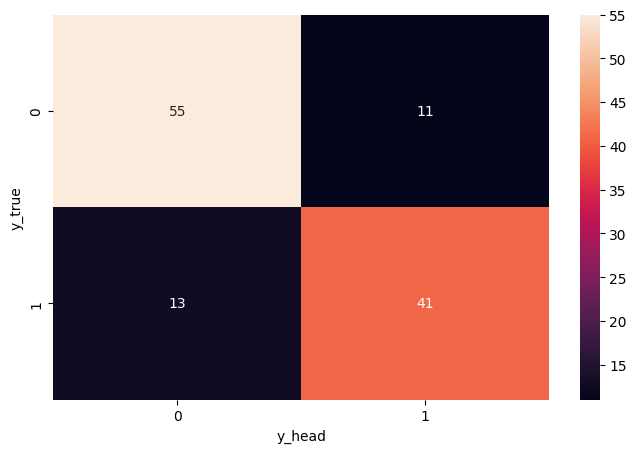

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [126]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [128]:
data_clean = pd.read_csv('sentiment_cellular_2.csv', encoding='latin1')
data_clean.head()

,Sentiment,Text Tweet
0,positive,usermention boikot providername produk ba...
1,positive,sakti alhamdulillah providername
2,negative,selamat pagi providername bantu kamar sinyal...
3,negative,dear providername jaring data lot banget
4,negative,selamat malam dusta providername


In [129]:
data_clean = data_clean.astype({'Sentiment' : 'category'})
data_clean = data_clean.astype({'Text Tweet' : 'string'})
data_clean.dtypes

,0
Sentiment,category
Text Tweet,string[python]


In [130]:
# PROSES TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Text Tweet'].astype('U'))
print(text_tf)

  (0, 681)	0.3867195794883465
  (0, 81)	0.3544825037361959
  (0, 513)	0.2089990945308186
  (0, 508)	0.5468624635563389
  (0, 46)	0.6181026984439268
  (1, 513)	0.14008235205034986
  (1, 543)	0.8285708605682566
  (1, 11)	0.5420768060535521
  (2, 513)	0.06655504749865963
  (2, 556)	0.3336863094302908
  (2, 472)	0.3482929657559757
  (2, 49)	0.3482929657559757
  (2, 282)	0.3936653844968609
  (2, 580)	0.19922632054952413
  (2, 221)	0.32175180222553995
  (2, 482)	0.3936653844968609
  (2, 125)	0.3936653844968609
  (2, 676)	0.18296239688195018
  (3, 513)	0.10521232095483382
  (3, 128)	0.6223186721236421
  (3, 261)	0.3149432592731495
  (3, 126)	0.42862652122400974
  (3, 363)	0.4138185941137875
  (3, 45)	0.3840495511689364
  (4, 513)	0.11054048083865711
  :	:
  (295, 697)	0.28905748271319226
  (295, 639)	0.39702183165170873
  (295, 341)	0.5465805823799055
  (295, 484)	0.44874220089854444
  (295, 362)	0.44874220089854444
  (296, 513)	0.16420281833346548
  (296, 11)	0.6354157965252006
  (296, 474)	

In [131]:
# Import cosine_similarity metrics
from sklearn.metrics.pairwise import cosine_similarity
# compute similarity using cosine similarity
cos_sim=cosine_similarity(text_tf, text_tf)

print(cos_sim)

[[1.         0.02927708 0.01390994 ... 0.02137982 0.01809916 0.01949621]
 [0.02927708 1.         0.00932319 ... 0.0143299  0.01213103 0.0130674 ]
 [0.01390994 0.00932319 1.         ... 0.00680833 0.00576362 0.06183969]
 ...
 [0.02137982 0.0143299  0.00680833 ... 1.         0.00885878 0.00954257]
 [0.01809916 0.01213103 0.00576362 ... 0.00885878 1.         0.0080783 ]
 [0.01949621 0.0130674  0.06183969 ... 0.00954257 0.0080783  1.        ]]


In [132]:
# splitting data menjadi 30 dan 70
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cos_sim, data_clean['Sentiment'], test_size=0.2, random_state=33)
print(X_test)
print(y_test)

[[0.05783342 0.03876304 0.01841685 ... 0.10509157 0.02396341 0.02581311]
 [0.02518547 0.01688065 0.07988534 ... 0.01232722 0.01043566 0.11196749]
 [0.0225821  0.01513573 0.00719119 ... 0.01105298 0.00935694 0.01007919]
 ...
 [0.28695243 0.01889813 0.04290596 ... 0.0138005  0.01168287 0.01258465]
 [0.02845478 0.01907191 0.00906133 ... 0.01392741 0.0117903  0.01270038]
 [0.01382559 0.00926665 0.00440271 ... 0.09457742 0.1626134  0.00617085]]
198    positive
273    negative
269    negative
240    positive
56     negative
11     negative
205    positive
297    positive
288    positive
69     positive
263    negative
151    positive
169    negative
140    positive
110    positive
254    negative
223    negative
35     negative
267    negative
185    negative
165    negative
274    negative
209    positive
155    negative
152    negative
62     negative
237    positive
1      positive
276    negative
50     positive
189    negative
101    positive
81     positive
290    positive
77     posit

In [134]:
# perform algoritma
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("knn Accuracy:" , accuracy_score(y_test,predicted))
print("knn Precision:" , precision_score(y_test,predicted, average="binary", pos_label="positive"))
print("knn Recall:" , recall_score(y_test,predicted, average="binary", pos_label="positive"))
print("knn f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="positive"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
print(classification_report(y_test, predicted, zero_division=0))

knn Accuracy: 0.7166666666666667
knn Precision: 0.6538461538461539
knn Recall: 0.68
knn f1_score: 0.6666666666666666
confusion matrix:
 [[26  9]
 [ 8 17]]

              precision    recall  f1-score   support

    negative       0.76      0.74      0.75        35
    positive       0.65      0.68      0.67        25

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



In [135]:
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
tn, fp, fn, tp

(26, 9, 8, 17)

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [143]:
knn = KNeighborsClassifier(n_neighbors=3)
cross_val_score(knn, cos_sim, data_clean['Sentiment'], cv=10)
print("Hasil KKN :",cross_val_score(knn, cos_sim, data_clean['Sentiment'], cv=10).mean())

Hasil KKN : 0.78
